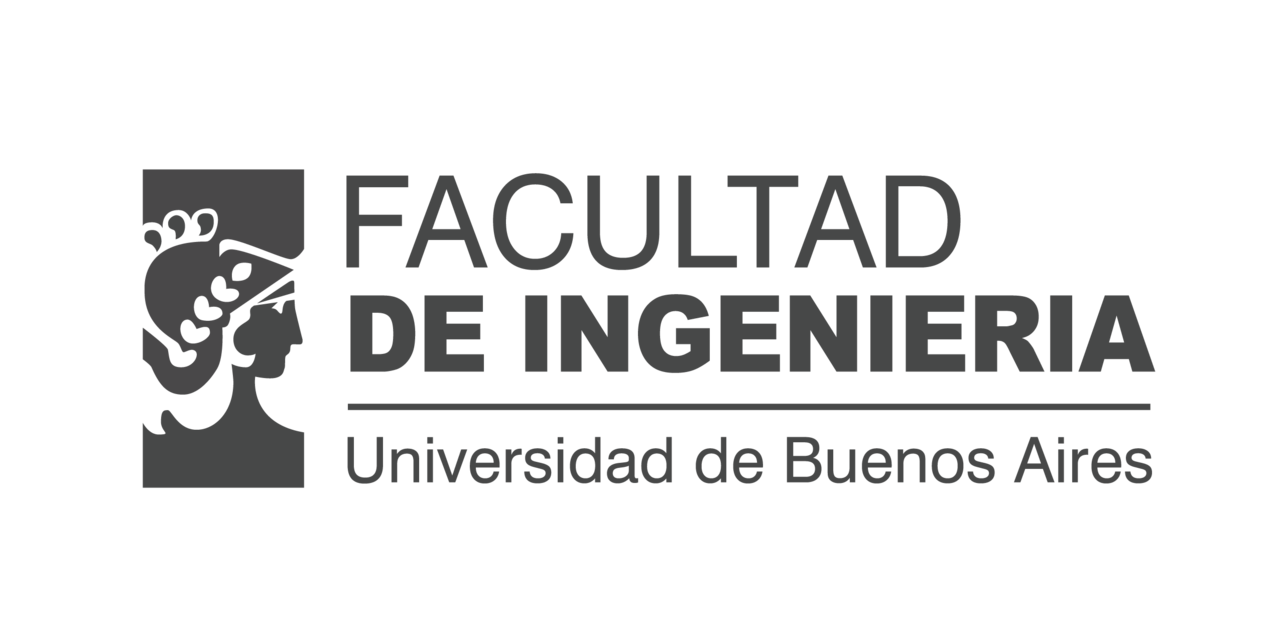

**Profesores:** <br />
Ing. Maxim Dorogov - mdorogov@fi.uba.ar <br />
Esp. Ing. Leandro Torrent - ingtorrentleandro@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Mg. Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/VpC1-TP1 <br />

# Trabajo Práctico 1

## Instalación de dependencias

In [1]:
%pip install numpy
%pip install opencv-python
%pip install matplotlib


[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Desarrollo del Trabajo Práctico

### Parte 1

#### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [3]:
def obtener_coordenadas_cromaticas(img):
    img = img.astype(np.float32)
    suma_rgb = np.sum(img, axis=2, keepdims=True)
    suma_rgb[suma_rgb == 0] = 1
    coordenadas_cromaticas = img / suma_rgb
    return coordenadas_cromaticas


#### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [4]:
def corregir_mediante_white_patch(img, percentil=95):
    img = img.astype(np.float32)
    valores_maximos = np.max(img, axis=(0, 1))
    valores_percentil = np.percentile(img, percentil, axis=(0, 1))
    valores_maximos = np.where(valores_maximos == 255, valores_percentil, valores_maximos)
    factor_correccion = 255 / valores_maximos
    img_corregida = img * factor_correccion
    img_corregida = np.clip(img_corregida, 0, 255).astype(np.uint8)
    return img_corregida


#### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

##### Resultados: Coordenadas cromáticas

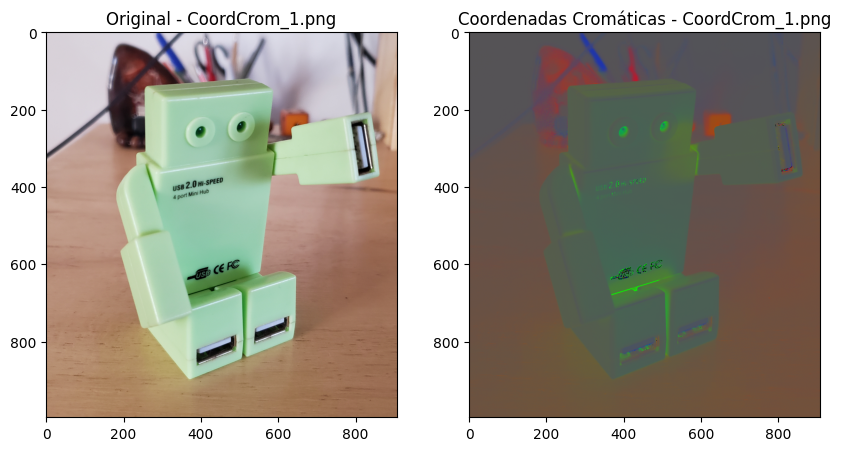

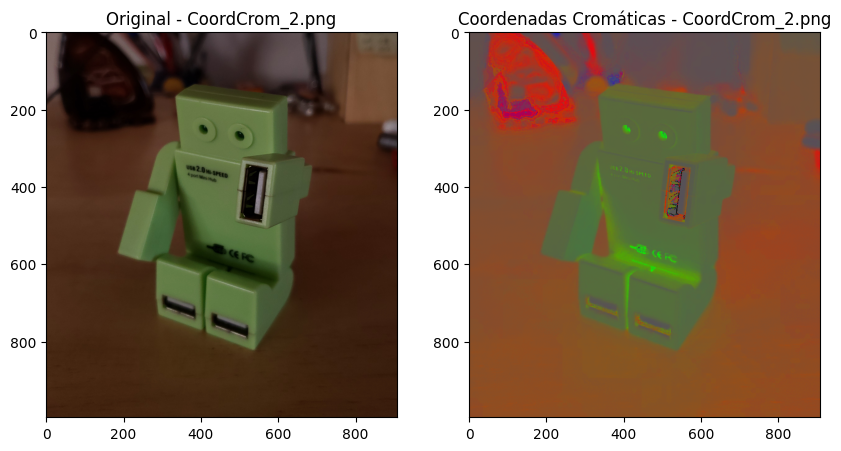

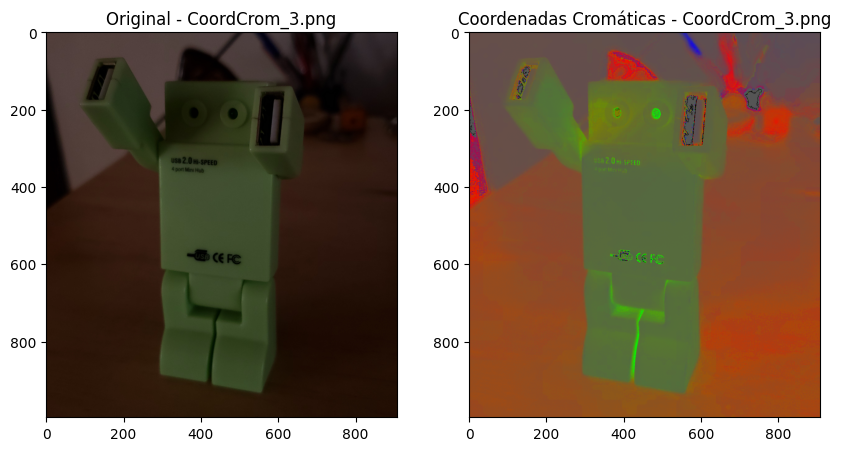

In [5]:
image_files = [
    'img/coord_cromaticas/CoordCrom_1.png',
    'img/coord_cromaticas/CoordCrom_2.png',
    'img/coord_cromaticas/CoordCrom_3.png'
]

for image_file in image_files:
    img = cv.imread(image_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    coordenadas_cromaticas = obtener_coordenadas_cromaticas(img)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original - {image_file.split("/")[-1]}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(coordenadas_cromaticas)
    plt.title(f'Coordenadas Cromáticas - {image_file.split("/")[-1]}')
    
    plt.show()

##### Resultados: White-Patch

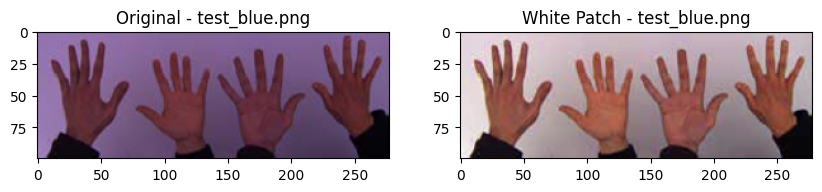

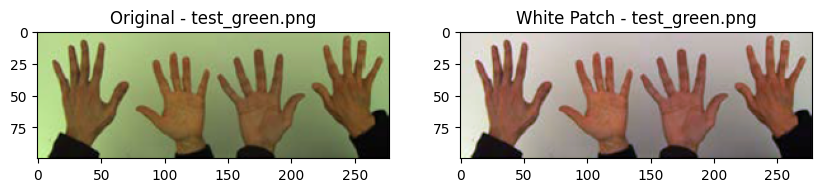

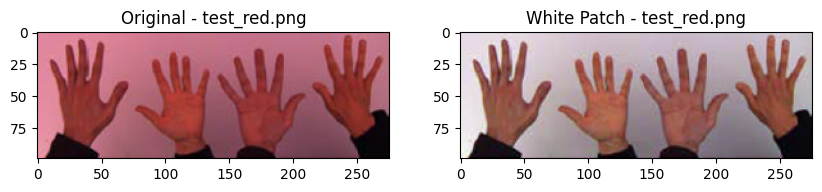

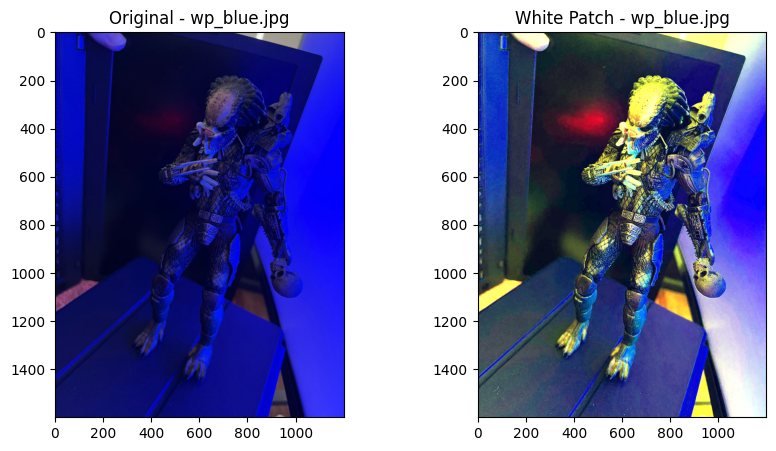

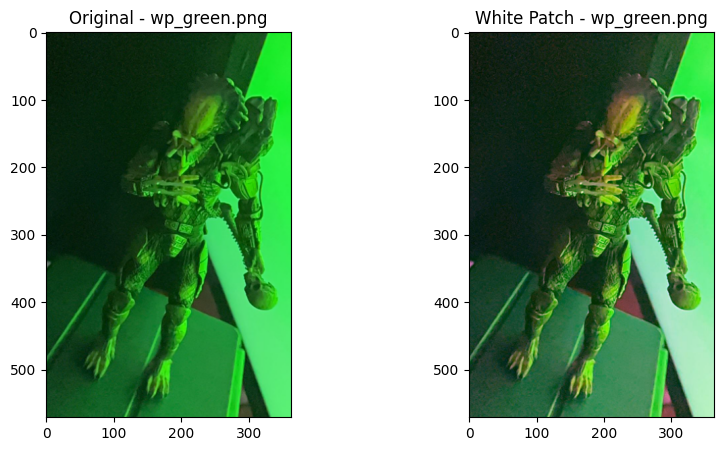

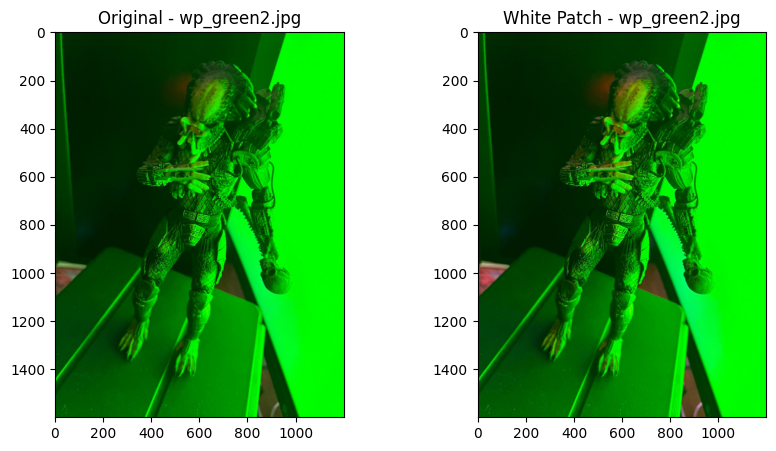

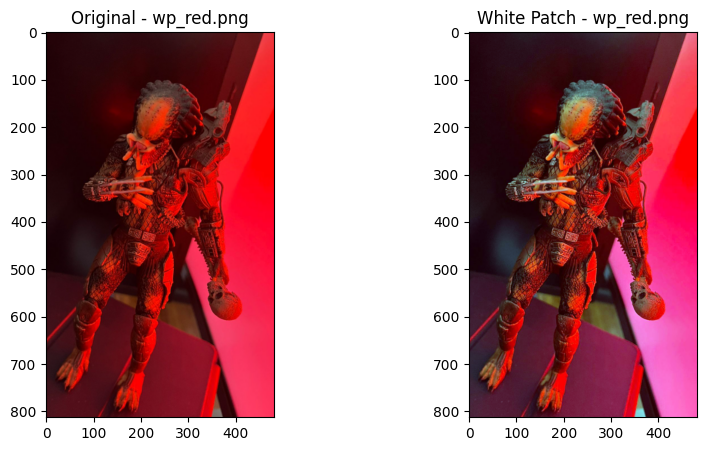

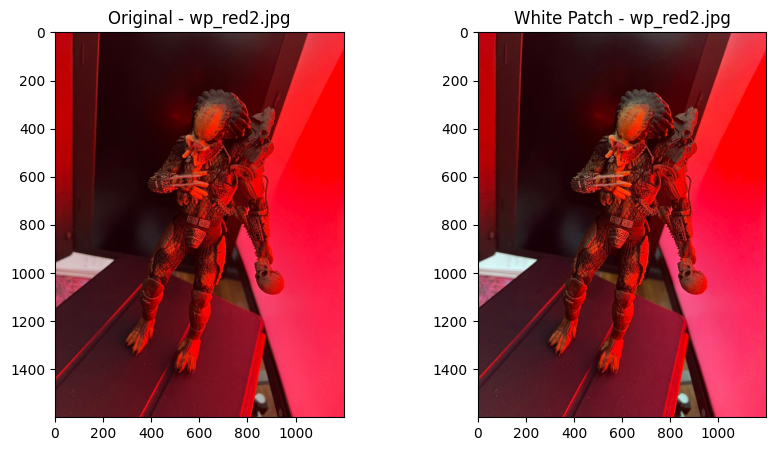

In [6]:
image_files = [
    'img/white_patch/test_blue.png',
    'img/white_patch/test_green.png',
    'img/white_patch/test_red.png',
    'img/white_patch/wp_blue.jpg',
    'img/white_patch/wp_green.png',
    'img/white_patch/wp_green2.jpg',
    'img/white_patch/wp_red.png',
    'img/white_patch/wp_red2.jpg', 
]

for image_file in image_files:
    img = cv.imread(image_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    imagen_corregida = corregir_mediante_white_patch(img)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original - {image_file.split("/")[-1]}')
    
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_corregida)
    plt.title(f'White Patch - {image_file.split("/")[-1]}')
    
    plt.show()

### Parte 2

#### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

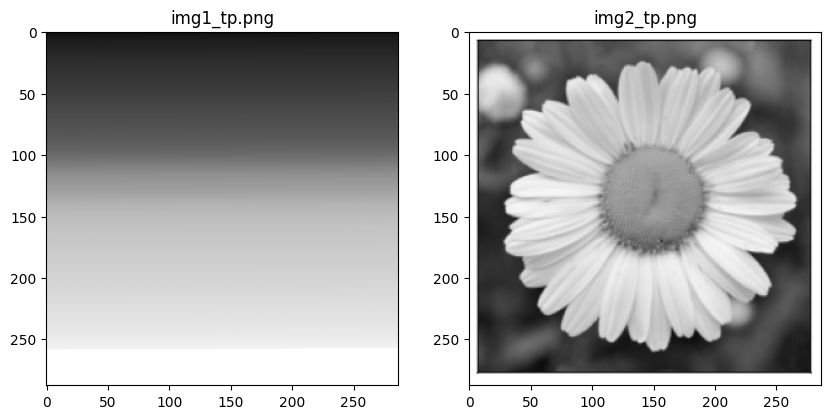

In [7]:
img1 = cv.imread('img/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img/img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255) 
plt.title('img1_tp.png')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('img2_tp.png')

plt.show()

#### 2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

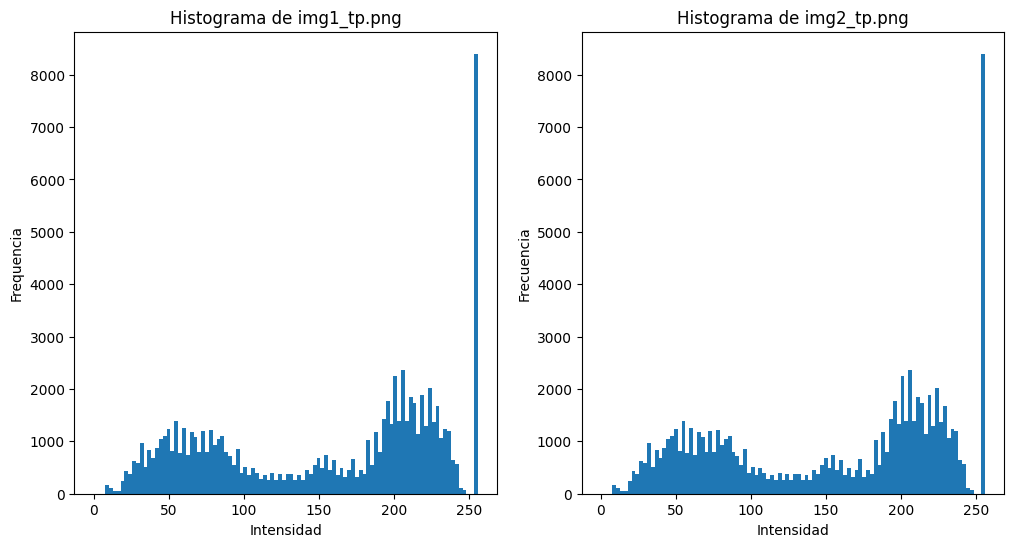

Resultado de la correlación entre histogramas: 1.0


In [8]:
n_bins = 100

histograma_img1 = cv.calcHist([img1], [0], None, [n_bins], [0, 256])
histograma_img2 = cv.calcHist([img2], [0], None, [n_bins], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(img1.ravel(), n_bins, range=[0, 256])
plt.title('Histograma de img1_tp.png')
plt.xlabel('Intensidad')
plt.ylabel('Frequencia')

plt.subplot(1, 2, 2)
plt.hist(img2.ravel(), n_bins, range=[0, 256])
plt.title('Histograma de img2_tp.png')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.show()

score = cv.compareHist(histograma_img1, histograma_img2, cv.HISTCMP_CORREL)
print(f'Resultado de la correlación entre histogramas: {score}')

Como puede observarse en los gráficos de los histogramas y en el resultado de la comparación realizada con OpenCV, ambos histogramas son idénticos. Esto implica que la distribución de valores de intensidades de píxeles es la misma para ambas imágenes. Sin embargo, al analizar las imágenes originales, se constató que no solo no eran iguales, sino que existía una diferencia significativa en lo que mostraban (una flor vs. una escala en degradé de grises). Esto nos permite concluir que un histograma no resulta particularmente útil para entrenar un modelo de clasificación o detección de imágenes, ya que no aporta información sobre el contenido visual real. Esto se debe a que los histogramas ignoran completamente las características espaciales presentes en las muestras.

#### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

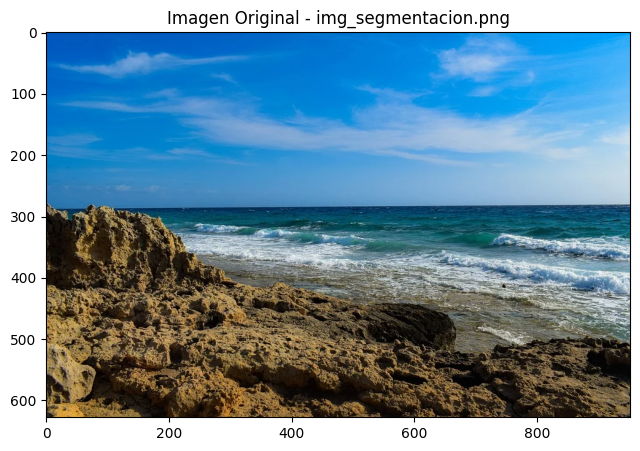

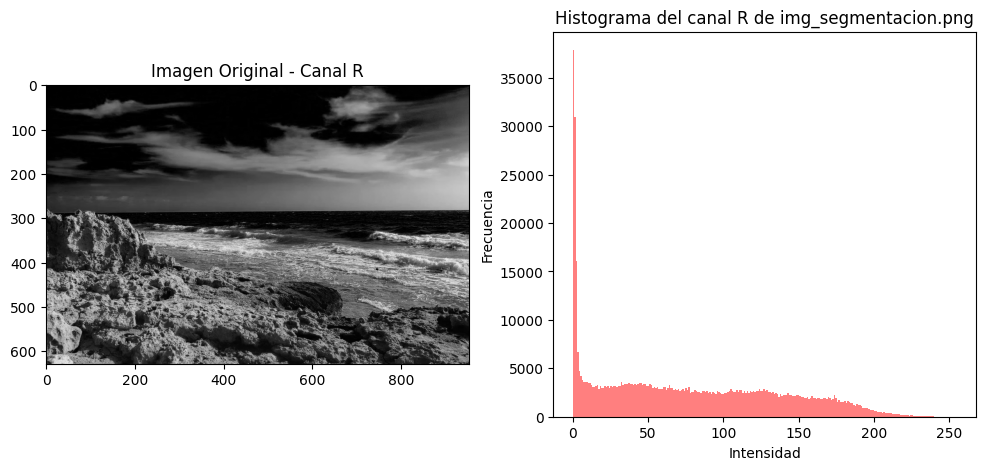

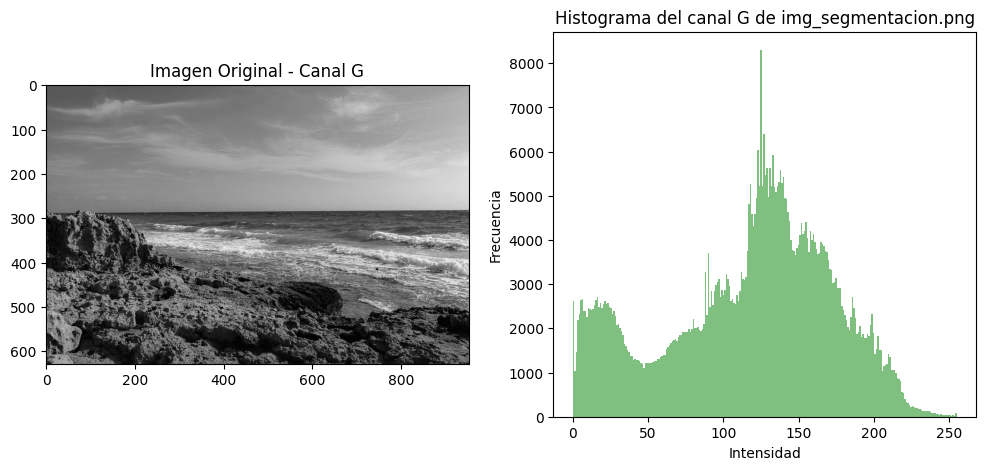

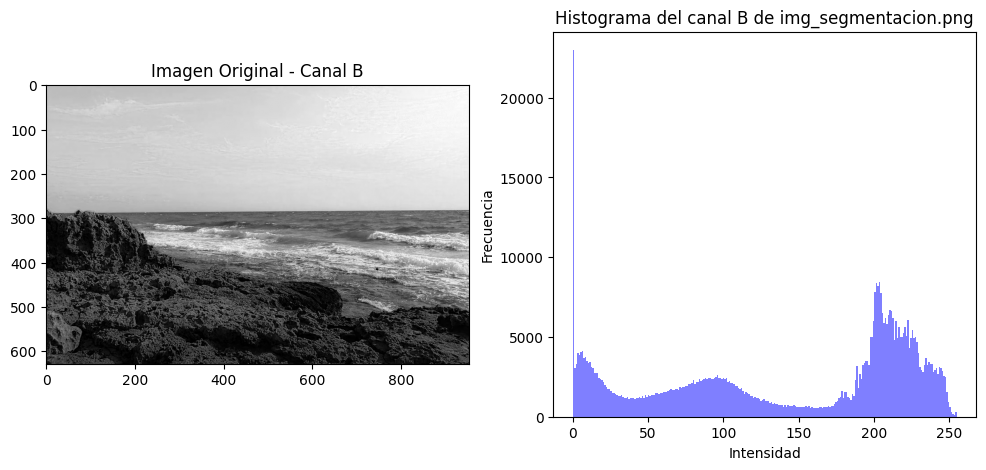

In [9]:
n_bins = 256

img_segmentacion = cv.imread('img/segmentacion.png')
img_segmentacion = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(img_segmentacion)
plt.title('Imagen Original - img_segmentacion.png')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_segmentacion[:, :, i], cmap='gray')
    plt.title(f'Imagen Original - Canal {color.upper()}')
    
    plt.subplot(1, 2, 2)
    plt.hist(img_segmentacion[:, :, i].ravel(), n_bins, color=color, alpha=0.5)
    plt.title(f'Histograma del canal {color.upper()} de img_segmentacion.png')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    
    plt.show()

In [112]:
def seg_img(title, muestra, mult_std_h=1, mult_std_s=1.5, mult_std_v=3):
    color_h_medio, color_s_medio, color_v_medio = np.mean(muestra, axis=(0,1))
    color_h_std, color_s_std, color_v_std = np.std(muestra, axis=(0,1))

    muestra = cv.cvtColor(muestra, cv.COLOR_HSV2RGB)
    plt.figure(figsize=(1,1))
    plt.title(f'Muestra {title}')
    plt.imshow(muestra)
    plt.show()

    display(f"Valores medios: h={color_h_medio}, s={color_s_medio}, v={color_v_medio}")
    display(f"Desvios: h={color_h_std}, s={color_s_std}, v={color_v_std}")

    color_h_std, color_s_std, color_v_std = np.std(muestra, axis=(0,1))
    color_h_std *= mult_std_h
    color_s_std *= mult_std_s
    color_v_std *= mult_std_v

    h_l = np.clip(color_h_medio-color_h_std, 0, 179)
    s_l = np.clip(color_s_medio-color_s_std, 0, 255)
    v_l = np.clip(color_v_medio-color_v_std, 0, 255)
    h_u = np.clip(color_h_medio+color_h_std, 0, 179)
    s_u = np.clip(color_s_medio+color_s_std, 0, 255)
    v_u = np.clip(color_v_medio+color_v_std, 0, 255)

    color_l = (h_l, s_l, v_l)
    color_u = (h_u, s_u, v_u)

    display(f"Valores HSV mínimos {title}: h={color_l[0]}, s={color_l[1]}, v={color_l[2]}")
    display(f"Valores HSV máximos {title}: h={color_u[0]}, s={color_u[1]}, v={color_u[2]}")

    mask = cv.inRange(img_segmentacion, color_l,  color_u)

    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mascara de segmentacion de {title}')
    plt.show()

    img_color = cv.bitwise_and(img_segmentacion, img_segmentacion, mask=mask)
    plt.imshow(cv.cvtColor(img_color, cv.COLOR_HSV2RGB))
    plt.title(f'Objeto segmentado {title}')
    plt.show()

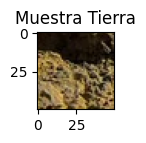

'Valores medios: h=18.5188, s=153.2076, v=95.078'

'Desvios: h=10.825490592116418, s=53.91390639009569, v=60.544574620687506'

'Valores HSV mínimos Tierra: h=0.0, s=71.48200623550055, v=0.0'

'Valores HSV máximos Tierra: h=79.06337462068751, s=234.9331937644995, v=214.1454166008485'

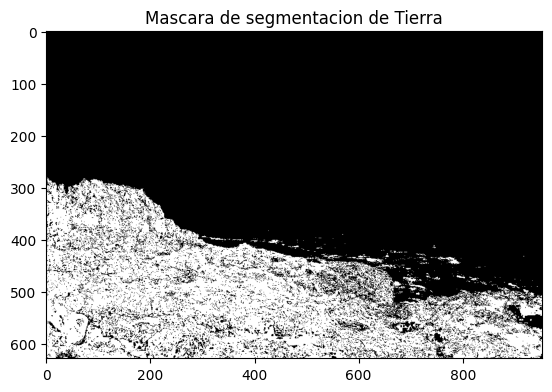

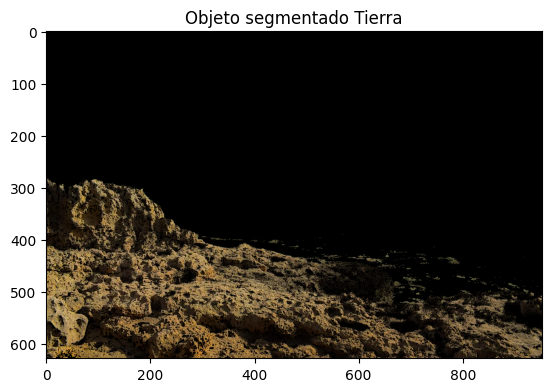

In [157]:
img_segmentacion = cv.imread('img/segmentacion.png')
img_segmentacion = cv.cvtColor(img_segmentacion, cv.COLOR_BGR2HSV)

seg_img("Tierra", img_segmentacion[400:450, 0:50, :], 1, 1.5, 3)

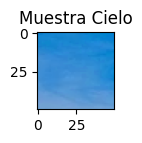

'Valores medios: h=103.426, s=186.7952, v=211.2652'

'Desvios: h=1.1725715329991448, s=35.468978797817144, v=2.955887169700478'

'Valores HSV mínimos Cielo: h=97.5351442251571, s=30.00445558745497, v=169.8827796241933'

'Valores HSV máximos Cielo: h=109.3168557748429, s=255.0, v=252.6476203758067'

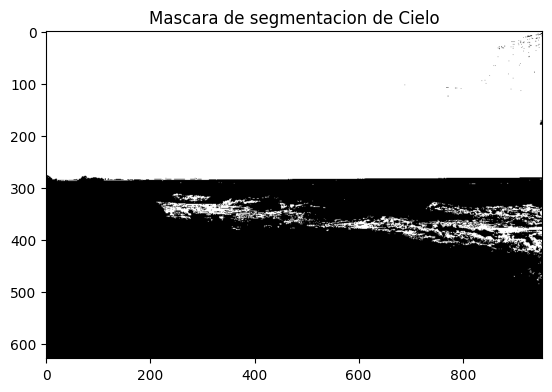

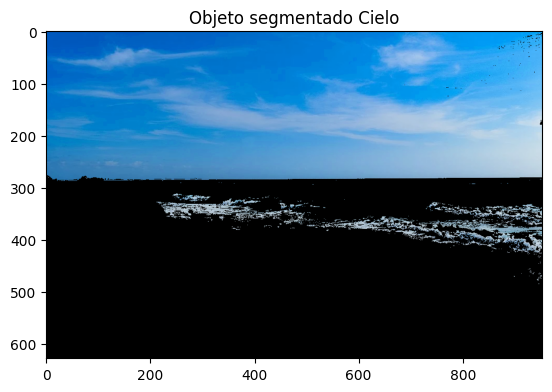

In [158]:
seg_img("Cielo", img_segmentacion[100:150, 300:350, :], 0.2, 18, 14)

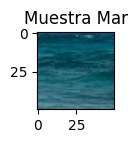

'Valores medios: h=95.564, s=196.822, v=107.9832'

'Desvios: h=1.3408594258907163, s=45.890163608337716, v=20.060262155814453'

'Valores HSV mínimos Mar: h=26.778192262694276, s=0.0, v=43.79036110139374'

'Valores HSV máximos Mar: h=164.3498077373057, s=255.0, v=172.17603889860624'

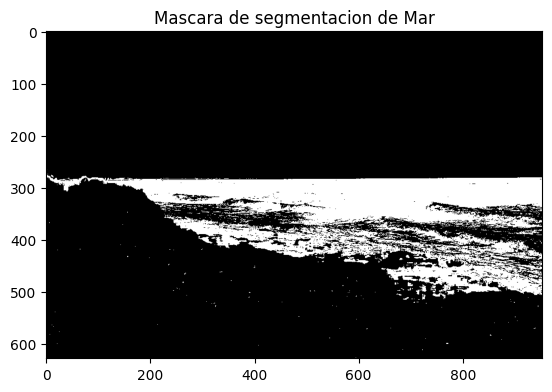

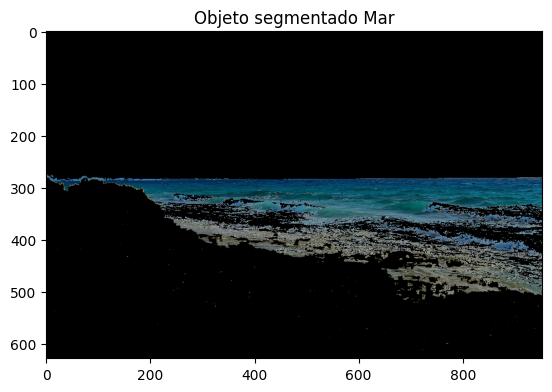

In [159]:
seg_img("Mar", img_segmentacion[300:350, 600:650, :], 2.8, 10, 3.2)